<a href="https://colab.research.google.com/github/kerenalli/MyExamplePython/blob/main/20210107_Mouth_Clipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this program we are clipping the mouth regions from the image and storing it on to the new folder mouth

Image Dimension    :  (256, 256, 3)
Image Height       :  256
Image Width        :  256
Number of Channels :  3


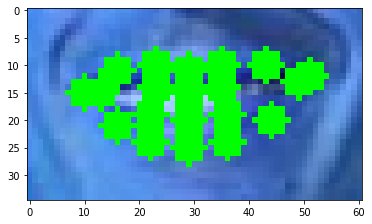

In [25]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
from PIL import Image 
import os

# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

# read the image
img = cv2.imread("/content/photo.jpg")

# Convert image into grayscale
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

# Use detector to find landmarks
faces = detector(gray)
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Create landmark object
    landmarks = predictor(image=gray, box=face)
    # Loop through all the points
    for n in range(48, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        # Draw a circle
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
                
    # Clip the mouth position from the image 
    xmouthpoints = [landmarks.part(x).x for x in range(48,67)]
    ymouthpoints = [landmarks.part(x).y for x in range(48,67)]
    maxx = max(xmouthpoints)
    minx = min(xmouthpoints)
    maxy = max(ymouthpoints)
    miny = min(ymouthpoints) 
    # to show the mouth properly pad both sides
    pad = 10
    crop_image = img[miny-pad:maxy+pad,minx-pad:maxx+pad]
    #cv2.resize(crop_image,(256,256))
    plt.imshow(crop_image)

im2=cv2.resize(crop_image,(256,256))
# get dimensions of image
dimensions = im2.shape
 
# height, width, number of channels in image

height = im2.shape[0]
width = im2.shape[1]
channels = im2.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

#Saving the cropped file to mouth directory
directory="mouth"
parent_directory='/content/sample_data'
path=os.path.join(parent_directory,directory)
try:
  os.makedirs(path, exist_ok=True)
  # Filename 
  filename = 'crop_image.jpg'  
  cv2.imwrite(filename, crop_image) 
except OSError as error:
  print(error)
# Using cv2.imwrite() method 
# Saving the image 
#plt.imshow(crop_image)
# (It will not change orginal image) 
# Delay between every frame
cv2.waitKey(delay=0)

# Close all windows
cv2.destroyAllWindows()